# 1  Import Necessary Libraries

In [2]:
import warnings

# warnings generated by the code to avoid clutter in the output.
#Useful for keeping notebooks or console logs clean, especially when warnings are not critical.

warnings.filterwarnings('ignore')#avoid errors

import pandas as pd

#library for data manipulation and analysis. Often used for handling structured data (e.g., CSV, Excel files).

import numpy as np

# library used for numerical operations and handling arrays. Provides tools for mathematical computations.

from sklearn.model_selection import train_test_split, cross_val_score

#train_test_split: Splits data into training and testing subsets for model evaluation.
#cross_val_score: Performs cross-validation to estimate the performance of a model more robustly.

from sklearn.preprocessing import LabelEncoder

#encodes categorical labels (e.g., "cat", "dog") into numerical values (e.g., 0, 1). This is necessary for most machine learning models.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#accuracy_score: Computes the percentage of correctly classified samples.
#classification_report: Provides precision, recall, F1-score, and support for each class.
#confusion_matrix: Displays a matrix showing the counts of true positives, false positives, true negatives, and false negatives for each class.

import seaborn as sns

#library for statistical data visualization. Built on top of Matplotlib, it provides high-level interfaces for creating visually appealing graphs.

import matplotlib.pyplot as plt

#mports Matplotlib's pyplot module for creating plots, graphs, and figures.

from sklearn.ensemble import RandomForestClassifier

#Imports the Random Forest Classifier, an ensemble-based machine learning algorithm.
#It creates multiple decision trees and aggregates their outputs for classification or regression tasks.

from tensorflow.keras.models import Sequential

#Imports the Sequential API from TensorFlow's Keras module to define deep learning models layer-by-layer.

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, Dropout

#Conv1D: A 1D Convolutional Layer for processing sequential data (e.g., time series).
#MaxPooling1D: A pooling layer that downsamples the input along the temporal dimension, reducing complexity.
#Flatten: Converts multidimensional input into a 1D vector for dense layers.
#Dense: A fully connected neural network layer.
#SimpleRNN: A Recurrent Neural Network layer for sequential data.
#Dropout: A regularization layer randomly drops a fraction of nodes to prevent overfitting.

from tensorflow.keras.utils import to_categorical

#Converts integer labels (e.g., 0, 1, 2) into one-hot encoded vectors (e.g., [1, 0, 0] for 0). 
#Many deep learning models require this format.

# 2 Load and Preprocess the Dataset

In [4]:
# Load the dataset

#This section prepares the data for further processing by- 
#loading it, cleaning it, and splitting it into features (X) and target (y) for modeling.

data = pd.read_csv("C:\\Users\\Shagun\\OneDrive\\Documents\\SHAGUN_DRIVE\\OneDrive\\Desktop\\JUPYTER\\sklearn\\.ipynb_checkpoints\\symtoms_prediction.csv")

# Loads the dataset from a CSV file into a Pandas DataFrame.
#pd.read_csv: Reads a CSV file. The file path is provided as a string.
# Check for missing values and duplicates

print("Missing Values:\n", data.isnull().sum().sum())

#data.isnull().sum(): Checks for missing values in each column.
#.sum().sum(): Computes the total number of missing values across the entire DataFrame.

print(f"Number of Duplicate Rows: {data.duplicated().sum()}")

#Checks for duplicate rows in the dataset and counts them.
#Prints the number of duplicate rows in the dataset
# Drop duplicate rows and fill missing values with 0

data = data.drop_duplicates().fillna(0)

print(f"Number of Duplicate Rows: {data.duplicated().sum()}")

#data.drop_duplicates(): Removes duplicate rows from the DataFrame.
#.fillna(0): Fills any remaining missing values (NaN) with 0.
#Cleans the dataset to ensure no duplicates or missing values are present.
# Split data into features (X) and target (y)

X = data.drop('prognosis', axis=1)

#data.drop('prognosis', axis=1): Drops the column named 'prognosis' from the DataFrame, leaving only the features.
#X: Represents the input features for the machine learning model.

y = data['prognosis']

#data['prognosis']: Extracts the 'prognosis' column as the target variable.
#y: Represents the labels or the outcome to predict in the dataset.


Missing Values:
 0
Number of Duplicate Rows: 4657
Number of Duplicate Rows: 0


# 3 Exploratory Data Analysis (EDA)

In [6]:
data.shape

#Returns the dimensions of the DataFrame as a tuple

(304, 133)

In [7]:
data.head()

#Displays the first 5 rows of the DataFrame by default. 
#This is useful to get a quick overview of the data, including column names, data types, and a few sample rows.

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection


In [8]:
data.describe()

# Provides summary statistics (data distribution, and potential scaling)for numerical columns in the DataFrame.
# What It Shows:
# Count: The number of non-null entries in each column.
# Mean: The average value for each column.
# Std: The standard deviation, a measure of data dispersion.
# Min: The smallest value in each column.
# 25% (1st Quartile): The value below which 25% of the data lies.
# 50% (Median): The value below which 50% of the data lies.
# 75% (3rd Quartile): The value below which 75% of the data lies.
# Max: The largest value in each column.

 # your dataset has non-numerical columns, they will be ignored in the output. 
# Use data.describe(include='all') to summarize all columns, including categorical ones.

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.134868,0.138158,0.013158,0.039474,0.013158,0.174342,0.151316,0.036184,0.049342,0.019737,...,0.013158,0.013158,0.013158,0.019737,0.019737,0.019737,0.019737,0.016447,0.016447,0.016447
std,0.342146,0.345635,0.114139,0.195040,0.114139,0.380029,0.358947,0.187056,0.216938,0.139324,...,0.114139,0.114139,0.114139,0.139324,0.139324,0.139324,0.139324,0.127398,0.127398,0.127398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print(data['prognosis'].value_counts())  # Count of each prognosis

prognosis
Hepatitis D                      10
Dengue                           10
Chickenpox                       10
Migraine                         10
Hepatitis B                       9
Hypoglycemia                      9
Common Cold                       9
Tuberculosis                      9
Hepatitis E                       9
Hepatitis A                       9
Typhoid                           9
Hyperthyroidism                   9
Jaundice                          9
Diabetes                          9
Pneumonia                         9
Varicose Veins                    8
Malaria                           8
Hypothyroidism                    8
Alcoholic Hepatitis               8
Chronic Cholestasis               8
Osteoarthritis                    7
Bronchial Asthma                  7
Vertigo                           7
Hepatitis C                       7
Peptic Ulcer Disease              7
Psoriasis                         7
GERD                              7
Arthritis         

In [10]:
# Checking the number of unique target classes (prognosis):

unique_prognoses = data['prognosis'].nunique()

#data['prognosis'].nunique(): Counts the number of unique values in the column 'prognosis'.
#Determines the number of distinct target classes (categories) in the dataset.
#Prints the count of unique prognoses.

print(f"Number of unique prognoses: {unique_prognoses}")
print('\n')

#data['prognosis'].unique(): Retrieves all unique values in the 'prognosis' column as an array.
#Lists all the distinct classes (prognoses) in the dataset.
#Displays the array of unique prognoses.
#Listing all unique target classes (prognosis):

prognoses_list = data['prognosis'].unique()

print("Unique prognoses:\n")
print(prognoses_list)

Number of unique prognoses: 41


Unique prognoses:

['Fungal Infection' 'Allergy' 'GERD' 'Chronic Cholestasis' 'Drug Reaction'
 'Peptic Ulcer Disease' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical Spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chickenpox' 'Dengue'
 'Typhoid' 'Hepatitis A' 'Hepatitis B' 'Hepatitis C' 'Hepatitis D'
 'Hepatitis E' 'Alcoholic Hepatitis' 'Tuberculosis' 'Common Cold'
 'Pneumonia' 'Dimorphic Hemmorhoids (piles)' 'Heart Attack'
 'Varicose Veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthritis' 'Arthritis' 'Vertigo' 'Acne' 'Urinary Tract Infection'
 'Psoriasis' 'Impetigo']


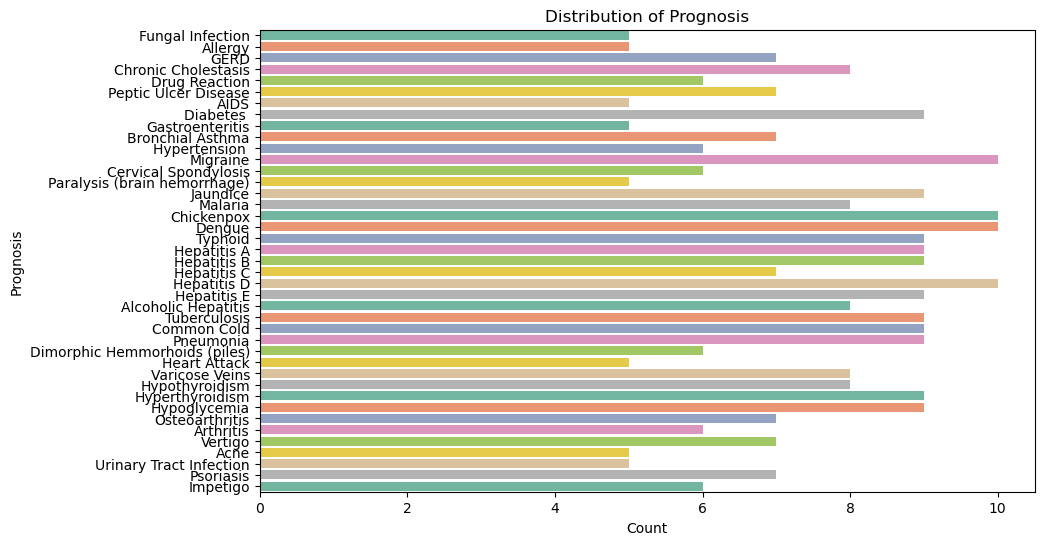

In [11]:
#Visualizing the distribution of target classes
# creates a visual representation of the distribution of the target variable (prognosis) using a count plot.

# there are five classes of prognosis like 'Flu', 'Cold', etc., 
# the plot would display horizontal bars where the length of each bar corresponds to the count of samples for that prognosis.

plt.figure(figsize=(10, 6))

# Specifies the size of the plot (width: 10, height: 6) for better visualization.

sns.countplot(y='prognosis', data=data, palette="Set2")  

# sns.countplot: A Seaborn function that plots the count of occurrences for each unique category in the specified column.
# y='prognosis': Specifies the column to plot on the y-axis (target classes are listed vertically).
# data=data: Refers to the DataFrame containing the data.
# palette="Set2": Sets a specific color palette for the bars to make the plot visually appealing.

plt.title('Distribution of Prognosis')
plt.xlabel('Count')
plt.ylabel('Prognosis')

# plt.title: Adds a title to the plot.
# plt.xlabel / plt.ylabel: Labels the x-axis and y-axis for clarity.

plt.show()
#Renders the plot so it can be displayed in the output.


In [12]:
# Check the data types of your columns

# data.dtypes: Displays the data type for each column in the DataFrame.
# Output: Lists column names along with their corresponding data types.

print(data.dtypes)


itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object


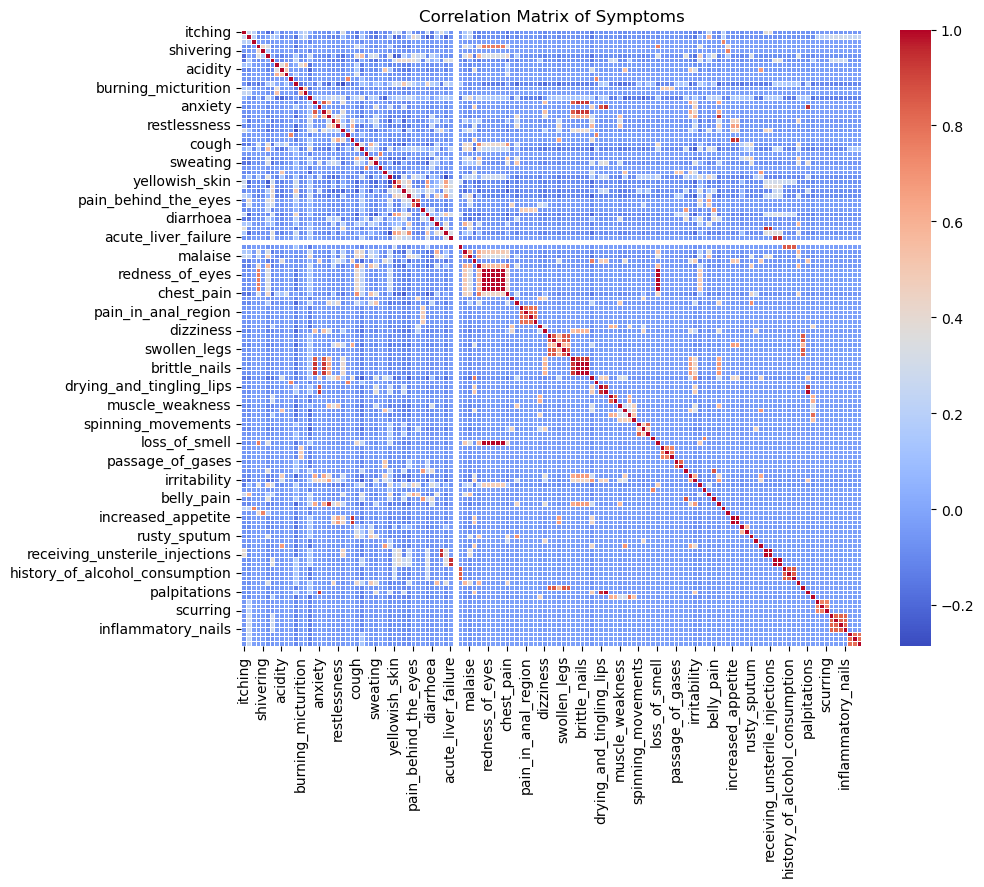

In [13]:
# Remove the 'prognosis' column from the dataset
numeric_data = data.drop(columns=['prognosis'])

#Removes the prognosis column (target variable) to focus on the numerical features only.
# data.drop(columns=['prognosis'])

# Drops the specified column and creates a new DataFrame, numeric_data.
# Calculate the correlation matrix for the numerical features
# Adds a title to the heatmap and renders the plot.
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

 

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.figure(figsize=(10, 8)): Sets the size of the heatmap figure.
    
# sns.heatmap: Creates the heatmap visualization.
# correlation_matrix: The matrix to visualize.
# annot=False: Disables displaying numeric values inside the heatmap cells (set True to enable them).
# cmap='coolwarm': Specifies the color scheme for the heatmap.
# fmt='.2f': Formats the correlation values (if annotations are enabled) to 2 decimal places.
# linewidths=0.5: Adds spacing between the cells for better visibility.

plt.title('Correlation Matrix of Symptoms')
plt.show()

# Adds a title to the heatmap and renders the plot.

# 4 Feature Selection with Random Forest

Top 40 Important Features:
                         Feature  Importance
97                   muscle_pain    0.021425
14                       fatigue    0.020953
0                        itching    0.019699
43             yellowing_of_eyes    0.019198
33                    dark_urine    0.018195
25                    high_fever    0.018179
11                      vomiting    0.017141
6                     joint_pain    0.016761
41                    mild_fever    0.016067
35              loss_of_appetite    0.016041
56                    chest_pain    0.015315
34                        nausea    0.015271
39                abdominal_pain    0.015025
31                      headache    0.014681
37                     back_pain    0.013289
28                      sweating    0.013007
99           red_spots_over_body    0.012502
5                         chills    0.012342
32                yellowish_skin    0.012339
40                     diarrhoea    0.011995
106               family_his

<Figure size 1400x1200 with 0 Axes>

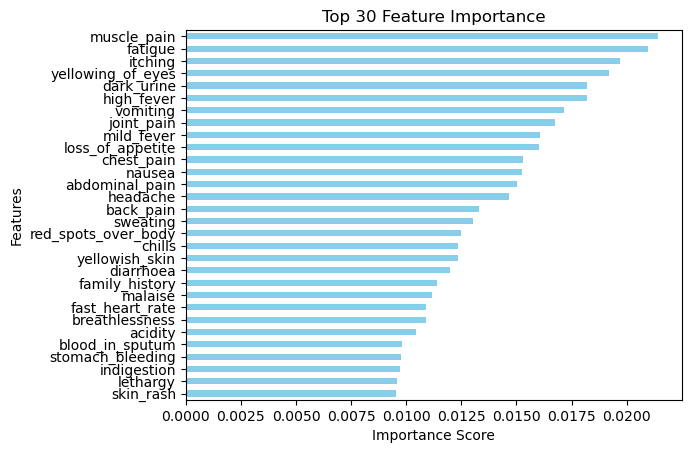

In [15]:
# Train a Random Forest model to determine feature importance

#RandomForestClassifier: Creates a Random Forest model, a powerful ensemble learning algorithm often used for classification tasks.
#random_state=42: Sets the random seed for reproducibility to ensure consistent results across runs.

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)

# Calculate feature importance

# rfc.feature_importances_: An attribute of the trained Random Forest model. 
#It provides an array of importance scores for each feature, where higher values indicate greater relevance for the target prediction.
# pd.DataFrame({...}): Creates a DataFrame with two columns:
# Feature: Names of the features (taken from X.columns).
# Importance: Importance scores from rfc.feature_importances_.
# .sort_values(by='Importance', ascending=False): Sorts the DataFrame in descending order of feature importance
#so the most important features are at the top.

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 40 features

#feature_importances.head(40): Selects the first 40 rows of the sorted DataFrame, representing the 40 most important features.
#['Feature']: Extract only the selected rows' feature names.
top_40_features = feature_importances.head(40)['Feature']

# Display top 40 features

# Assumes feature_importances is a DataFrame sorted by importance in descending order.
# Retrieves the names of the top 40 features.

print("Top 40 Important Features:")
print(feature_importances.head(40))

# Visualize the top 30 features

# Creates a horizontal bar chart for the top 30 features by importance.
# Features with the highest importance appear at the top for better visual clarity.
                                                      
plt.figure(figsize=(14, 12))
feature_importances.head(30).plot(kind='barh', x='Feature', y='Importance', color='skyblue', legend=False)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 30 Feature Importance')
plt.gca().invert_yaxis()  # Most important features at the top
plt.show()

# Prepare data with top 40 features

# Filters the original dataset (X) to include only the top 40 important features.
X_selected = X[top_40_features]


# 5 Split Data into Training and Testing Sets

In [17]:
# Split data into training and testing sets

# X_selected: The feature set with the top 40 features selected earlier.
# y: The target variable (categorical or numerical labels).

# X_train, y_train: Training data (70% of the dataset).
# X_test, y_test: Testing data (30% of the dataset).
# test_size=0.3: Specifies the proportion of the dataset to include in the test split.
# random_state=42: Ensures consistent results across multiple runs by fixing the random seed.
    
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# fit_transform: Encodes the training labels and creates a mapping of categories to integers.
# transform: Encodes the testing labels using the mapping learned from the training labels.

# Encode target labels for CNN and RNN

#Converts integer-encoded labels into one-hot encoded vectors for compatibility with neural networks like CNNs and RNNs.
                                                              
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode target labels for CNN and RNN
# to_categorical is part of tensorflow.keras.utils.

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


# 6 Random Forest Classifier

In [19]:
# Train a Random Forest model with top 40 features

# RandomForestClassifier:
# n_estimators=100: The number of trees in the forest (100 is a good starting point).
# random_state=42: Ensures reproducible results.
# class_weight='balanced': Adjusts class weights inversely proportional to their frequencies, useful for imbalanced datasets.
# fit:
# Trains the Random Forest model using the training data (X_train, y_train).

rfc_top_40 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc_top_40.fit(X_train, y_train)

# Generates predictions (y_pred_rfc) for the test dataset (X_test) using the trained model.
# Compares the predicted labels (y_pred_rfc) with the true labels (y_test) and calculates accuracy.

# Make predictions and evaluate
y_pred_rfc = rfc_top_40.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Accuracy: {accuracy_rfc:.4f}")

Random Forest Accuracy: 0.8587


In [20]:
# # Classification report and confusion matrix
# Precision: The ratio of true positive predictions to all positive predictions (TP / (TP + FP)).
# Recall (Sensitivity): The ratio of true positive predictions to all actual positives (TP / (TP + FN)).
# F1-Score: The harmonic mean of precision and recall, balancing the two metrics.
# Support: The number of actual occurrences of each class in y_test.

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rfc))

Classification Report (Random Forest):
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       0.50      0.67      0.57         3
          Alcoholic Hepatitis       1.00      1.00      1.00         1
                      Allergy       0.00      0.00      0.00         4
                    Arthritis       1.00      0.50      0.67         2
             Bronchial Asthma       1.00      1.00      1.00         4
         Cervical Spondylosis       0.67      1.00      0.80         2
                   Chickenpox       1.00      1.00      1.00         5
          Chronic Cholestasis       1.00      1.00      1.00         4
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         4
                    Diabetes        1.00      0.50      0.67         2
Dimorphic Hemmorhoids (piles)       0

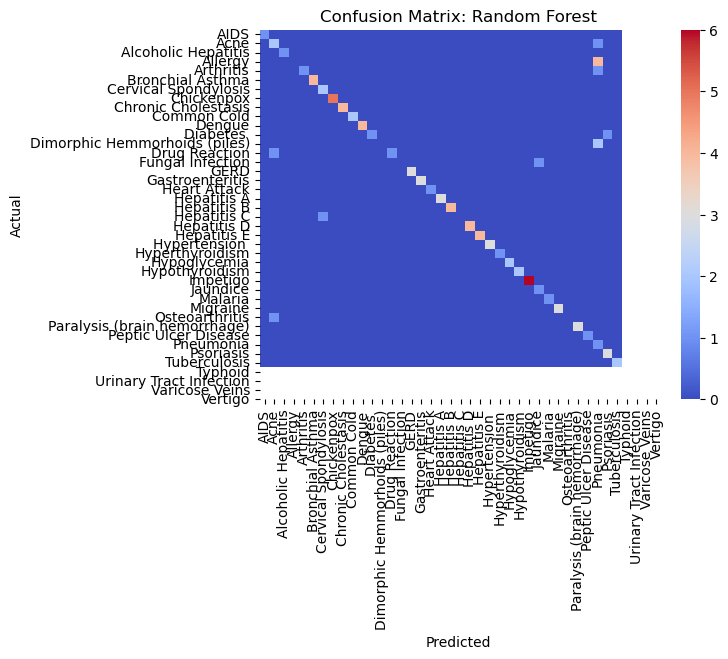

In [21]:
# Plot confusion matrix

# confusion_matrix: Creates a 2D array where rows represent actual classes, and columns represent predicted classes.
# annot=False: Omits numerical annotations inside the heatmap cells. Set annot=True to include these values.
# fmt='d': Ensures integer formatting for cell annotations.
# cmap='coolwarm': Defines the color map for visualization. Alternatives include Blues, Greens, etc.
# xticklabels and yticklabels: Use the class names from the label_encoder for the axes.

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=False, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 7 Convolutional Neural Network (CNN)

In [23]:
# Reshape data for CNN

# Layers:
# Conv1D(32, kernel_size=3, activation='relu'):
# 32 filters, kernel size of 3.
# Applies 1D convolutions to learn patterns from the 40 features.
# Flatten():
# Converts the 3D feature map into a 1D vector for the dense layers.
# Dense(64, activation='relu'):
# Fully connected layer with 64 units for non-linear transformations.
# Dense(y_train_categorical.shape[1], activation='softmax'):
# Output layer with neurons equal to the number of classes.
# softmax: Outputs probability
X_train_cnn = X_train.values.reshape(-1, 40, 1)
X_test_cnn = X_test.values.reshape(-1, 40, 1)

# Define CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# adam: An adaptive optimizer for efficient training.
# categorical_crossentropy: Loss function for multi-class classification.
# metrics=['accuracy']: Tracks accuracy during training and evaluation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# epochs=10: Number of complete passes through the dataset.
# batch_size=16: Number of samples per batch.
# verbose=1: Displays training progress.
    
# Train CNN
cnn_model.fit(X_train_cnn, y_train_categorical, epochs=10, batch_size=16, verbose=1)

# evaluate returns the loss and metrics on the test set.
# [1]: Extracts the accuracy metric.

# Evaluate CNN
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_categorical, verbose=0)[1]
print(f"CNN Accuracy: {cnn_accuracy:.4f}")






Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1020 - loss: 3.6613
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3089 - loss: 3.3564
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4043 - loss: 2.9310 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5542 - loss: 2.4234
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6528 - loss: 2.0226
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7748 - loss: 1.4858 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8488 - loss: 1.1762
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8416 - loss: 0.9009
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.6737 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9232 - loss: 0.4481 
CNN Accuracy: 0.8587


In [24]:
# Classification report and confusion matrix

cnn_model.predict(X_test_cnn)

# Produces class probabilities for each sample in the test set.
# Shape: 
# (num_samples,num_classes)
# (num_samples,num_classes)


# .argmax(axis=1): Converts probabilities into class labels by taking the index of the highest probability for each sample.

# classification_report:
# Provides precision, recall, F1-score, and support for each class.
# Input:
# y_test_encoded: True class labels.
# y_pred_cnn: Predicted class labels.
    
y_pred_cnn = cnn_model.predict(X_test_cnn).argmax(axis=1)
print("Classification Report (CNN):")
print(classification_report(y_test_encoded, y_pred_cnn))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report (CNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         4
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      0.50      0.67         2
          12       0.40      1.00      0.57         2
          13       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         1
          18       1.00      1

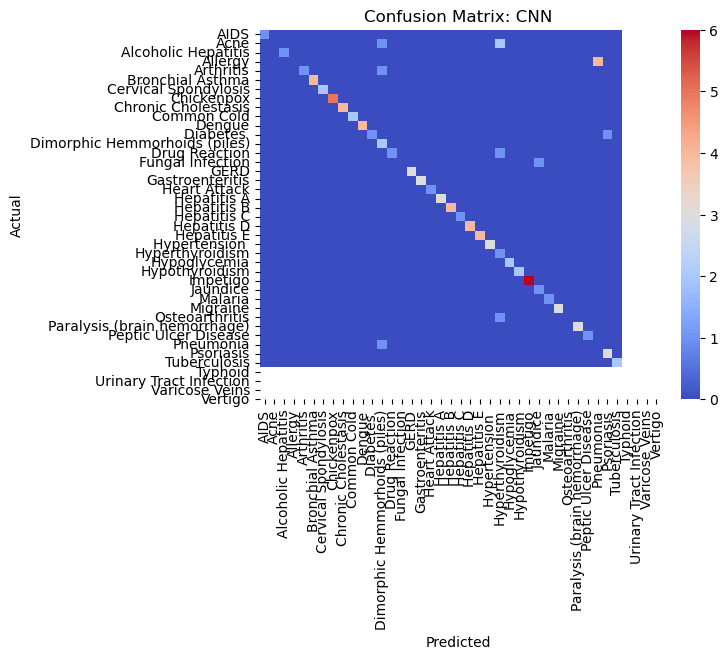

In [25]:
# Plot confusion matrix

# Generates the confusion matrix as a 2D array where:
# Rows represent the true labels.
# Columns represent the predicted labels.
    
cm_cnn = confusion_matrix(y_test_encoded, y_pred_cnn)
sns.heatmap(cm_cnn, annot=False, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# annot=False:
# Omits numerical annotations inside the heatmap cells.
# fmt='d':
# Formats annotations as integers.
# cmap='coolwarm'
# Specifies the color map for the heatmap visualization.
# xticklabels & yticklabels:
# Use class names obtained from the label_encoder for clarity.

# Adds a title and axis labels to make the plot self-explanatory.

plt.title("Confusion Matrix: CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8 Recurrent Neural Network (RNN)

In [27]:
# Reshape data for RNN
# RNNs require 3D input tensors with the shape 
# (samples, timesteps, features)
# (samples, timesteps, features).
# 40
# 40: Features treated as "timesteps" (sequence length).
# 1
# 1: Each feature is treated as a single "channel".

X_train_rnn = X_train.values.reshape(-1, 40, 1)
X_test_rnn = X_test.values.reshape(-1, 40, 1)

# SimpleRNN(64, activation='relu'):
# RNN with 64 units to process sequential patterns.
# Uses ReLU activation for non-linear transformations.
# Dense(64, activation='relu'):
# Fully connected layer with 64 units.
# Dense(y_train_categorical.shape[1], activation='softmax'):
# Output layer for multi-class classification.
# Uses softmax to output probabilities for each class.

# Define RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# adam: Adaptive optimizer for efficient training.
# categorical_crossentropy: Suitable for multi-class classification.
# metrics=['accuracy']: Tracks accuracy during training and evaluation.

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# epochs=10: Number of complete training cycles.
# batch_size=16: Number of samples per training batch.
# verbose=1: Displays progress during training.
    
# Train RNN
rnn_model.fit(X_train_rnn, y_train_categorical, epochs=10, batch_size=16, verbose=1)

# Returns loss and metrics on the test set.
# [1] extracts accuracy from the evaluation results.

# Evaluate RNN
rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test_categorical, verbose=0)[1]
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0550 - loss: 3.6999 
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0844 - loss: 3.6705
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0850 - loss: 3.6302 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0696 - loss: 3.5284   
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1948 - loss: 3.3214
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2101 - loss: 3.0945
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2159 - loss: 2.8260 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3112 - loss: 2.4480
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3348 - loss: 2.6344
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3211 - loss: 2.5599
RNN Accuracy: 0.5109


In [28]:
# Classification report and confusion matrix

# Metrics:

# Precision: Proportion of correct predictions for each class.
# Recall: Proportion of actual instances correctly identified.
# F1-score: Harmonic mean of precision and recall.
# Misclassifications:

# Check the confusion matrix for patterns where the RNN struggles to distinguish between classes.
                          
y_pred_rnn = rnn_model.predict(X_test_rnn).argmax(axis=1)
print("Classification Report (RNN):")
print(classification_report(y_test_encoded, y_pred_rnn))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Classification Report (RNN):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.45      1.00      0.62         5
           8       0.00      0.00      0.00         4
           9       0.50      1.00      0.67         2
          10       0.57      1.00      0.73         4
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.17      0.33      0.22         3
          19  

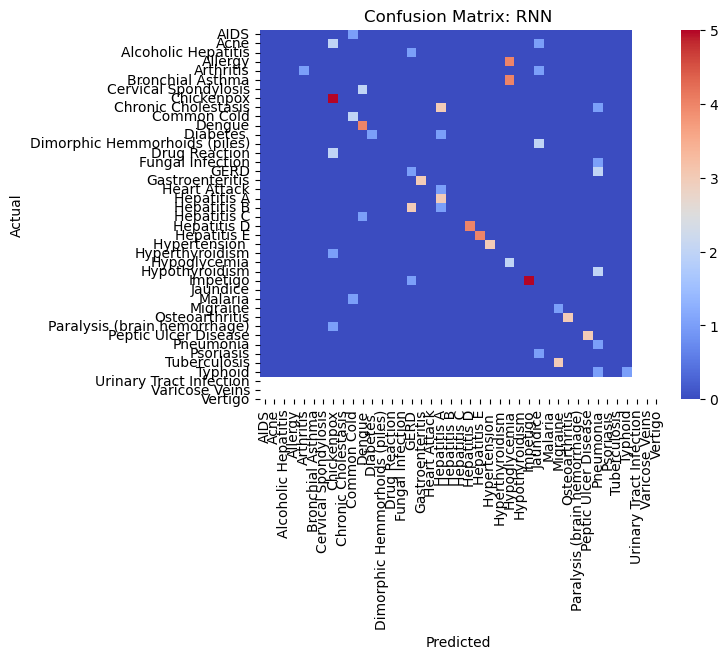

In [29]:
# # Plot confusion matrix
# The confusion_matrix function creates a 2D array where:
# Rows represent the true classes.
# Columns represent the predicted classes.
# Each cell value shows the number of instances for that combination of true and predicted labels.

cm_rnn = confusion_matrix(y_test_encoded, y_pred_rnn)
sns.heatmap(cm_rnn, annot=False, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# annot=False:
# Avoids displaying numerical values inside the heatmap cells.
# Change to True to include annotations.
# fmt='d':
# Formats annotations as integers.
# cmap='coolwarm':
# Uses a cool-to-warm color palette for visual emphasis.
# xticklabels & yticklabels:
# Displays the class names from the label_encoder instead of numeric indices.

plt.title("Confusion Matrix: RNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9 Model Comparison

In [31]:
# Starts with a header to introduce the comparison of models.

print(f"Model Comparison:")

# Formats and prints the accuracies to four decimal places for precision.
# accuracy_rfc: Random Forest accuracy from earlier computations.
# cnn_accuracy: CNN accuracy computed during the evaluation.
# rnn_accuracy: RNN accuracy computed during the evaluation.



print(f"Random Forest Accuracy: {accuracy_rfc:.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"RNN Accuracy: {rnn_accuracy:.4f}")


Model Comparison:
Random Forest Accuracy: 0.8587
CNN Accuracy: 0.8587
RNN Accuracy: 0.5109


In [32]:
import joblib


# joblib.dump():
# Serializes the model object (rfc_top_40) to a file named random_forest_model.pkl.
# Format: .pkl (Pickle format), commonly used for saving Python objects.
# Advantages of Saving Models:
# Reuse without retraining.
# Share with others or deploy for production.

# Save the Random Forest model
joblib.dump(rfc_top_40, "random_forest_model.pkl")

# joblib.load():
# Deserializes the saved model file and restores it as a Python object.
# Useful for validating the saved model or making new predictions.

# Load the saved Random Forest model (for testing)
loaded_rfc = joblib.load("random_forest_model.pkl")

# Confirms the successful execution of the saving process.
print("model saved ")


model saved 


Random Forest Accuracy: 0.8587
Random Forest Classification Report:
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       0.50      0.67      0.57         3
          Alcoholic Hepatitis       1.00      1.00      1.00         1
                      Allergy       0.00      0.00      0.00         4
                    Arthritis       1.00      0.50      0.67         2
             Bronchial Asthma       1.00      1.00      1.00         4
         Cervical Spondylosis       0.67      1.00      0.80         2
                   Chickenpox       1.00      1.00      1.00         5
          Chronic Cholestasis       1.00      1.00      1.00         4
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         4
                    Diabetes        1.00      0.50      0.67         2
Dimorphi

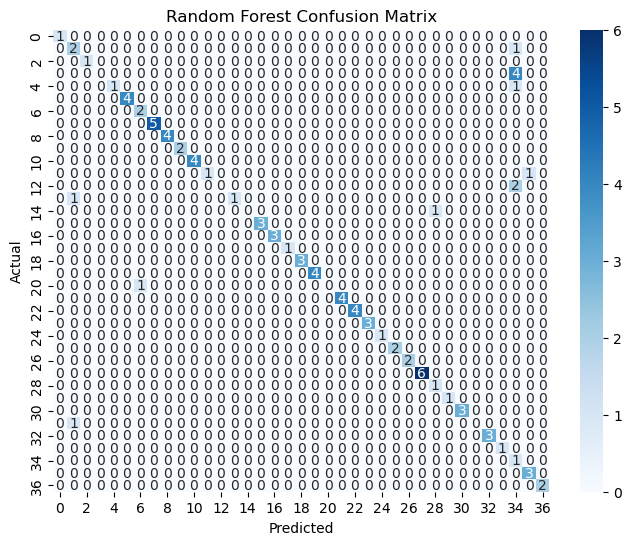

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
CNN Accuracy: 0.8587
CNN Classification Report:
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       0.00      0.00      0.00         3
          Alcoholic Hepatitis       1.00      1.00      1.00         1
                      Allergy       0.00      0.00      0.00         4
                    Arthritis       1.00      0.50      0.67         2
             Bronchial Asthma       1.00      1.00      1.00         4
         Cervical Spondylosis       1.00      1.00      1.00         2
                   Chickenpox       1.00      1.00      1.00         5
          Chronic Cholestasis       1.00      1.00      1.00         4
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         4
                    Diabetes        1.00      0.50      0.67 

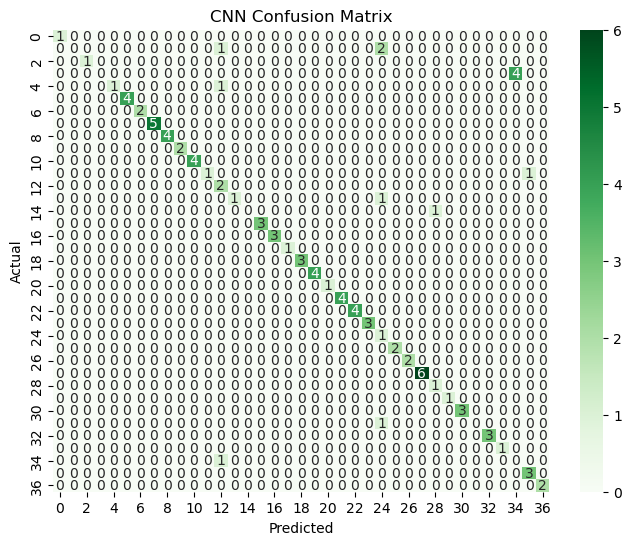

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RNN Accuracy: 0.5109
RNN Classification Report:
                               precision    recall  f1-score   support

                         AIDS       0.00      0.00      0.00         1
                         Acne       0.00      0.00      0.00         3
          Alcoholic Hepatitis       0.00      0.00      0.00         1
                      Allergy       0.00      0.00      0.00         4
                    Arthritis       1.00      0.50      0.67         2
             Bronchial Asthma       0.00      0.00      0.00         4
         Cervical Spondylosis       0.00      0.00      0.00         2
                   Chickenpox       0.45      1.00      0.62         5
          Chronic Cholestasis       0.00      0.00      0.00         4
                  Common Cold       0.50      1.00      0.67         2
                       Dengue       0.57      1.00      0.73         4
                    Diabetes        1.00      0.50      0.67 

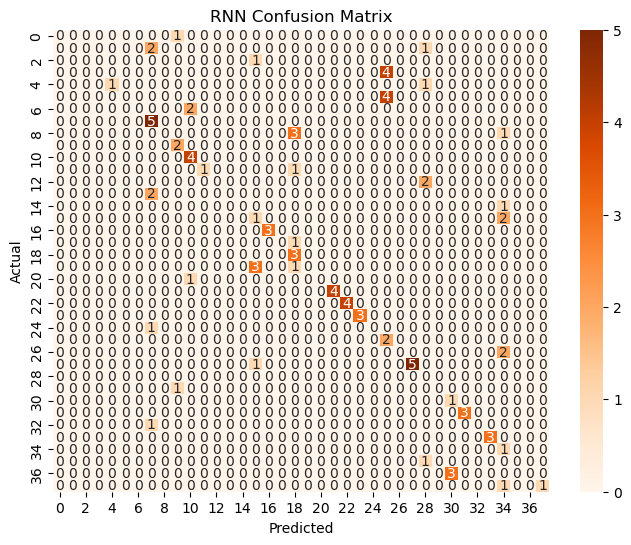

Model Comparison:
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.858696   0.855374  0.858696  0.845135
1            CNN  0.858696   0.855978  0.858696  0.844720
2            RNN  0.510870   0.432972  0.510870  0.437799


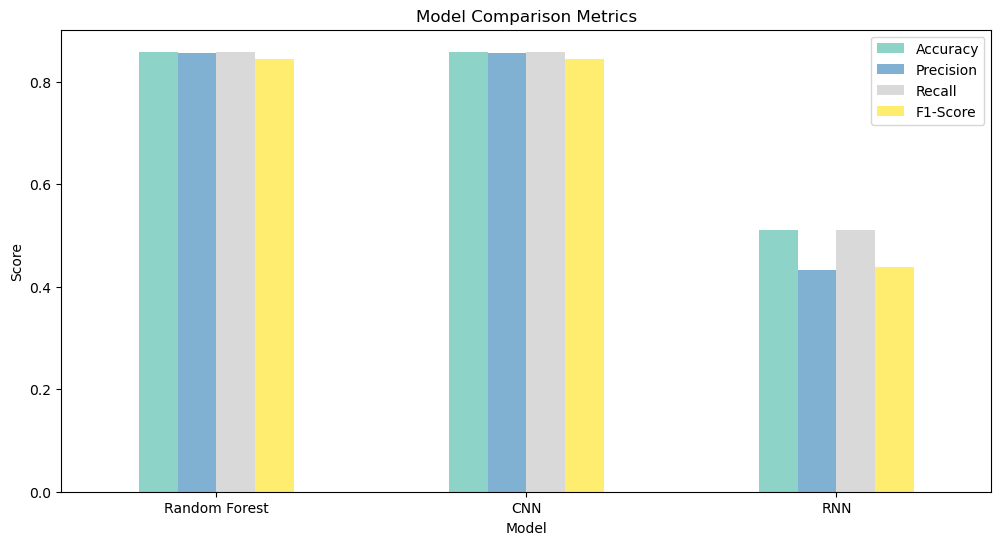

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# --- Random Forest Evaluation ---
# Accuracy already computed as accuracy_rfc
# Prints the accuracy of the Random Forest model (accuracy_rfc), formatted to 4 decimal places.
print(f"Random Forest Accuracy: {accuracy_rfc:.4f}")

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))

# Additional Metrics
rf_precision = precision_score(y_test, y_pred_rfc, average='weighted')
rf_recall = recall_score(y_test, y_pred_rfc, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rfc, average='weighted')

# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- CNN Evaluation ---
# Accuracy already computed as cnn_accuracy
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
y_pred_cnn_decoded = label_encoder.inverse_transform(y_pred_cnn)

print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn_decoded))

# Additional Metrics
cnn_precision = precision_score(y_test, y_pred_cnn_decoded, average='weighted')
cnn_recall = recall_score(y_test, y_pred_cnn_decoded, average='weighted')
cnn_f1 = f1_score(y_test, y_pred_cnn_decoded, average='weighted')

# Confusion Matrix
cnn_cm = confusion_matrix(y_test, y_pred_cnn_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- RNN Evaluation ---
# Accuracy already computed as rnn_accuracy
y_pred_rnn = np.argmax(rnn_model.predict(X_test_rnn), axis=1)
y_pred_rnn_decoded = label_encoder.inverse_transform(y_pred_rnn)

print(f"RNN Accuracy: {rnn_accuracy:.4f}")
print("RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn_decoded))

# Additional Metrics
rnn_precision = precision_score(y_test, y_pred_rnn_decoded, average='weighted')
rnn_recall = recall_score(y_test, y_pred_rnn_decoded, average='weighted')
rnn_f1 = f1_score(y_test, y_pred_rnn_decoded, average='weighted')

# Confusion Matrix
# Uses a blue color map for the heatmap.
rnn_cm = confusion_matrix(y_test, y_pred_rnn_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Oranges')
plt.title("RNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Comparison Table ---
# Compiling metrics into a DataFrame for comparison

comparison = pd.DataFrame({
    'Model': ['Random Forest', 'CNN', 'RNN'],
    'Accuracy': [accuracy_rfc, cnn_accuracy, rnn_accuracy],
    'Precision': [rf_precision, cnn_precision, rnn_precision],
    'Recall': [rf_recall, cnn_recall, rnn_recall],
    'F1-Score': [rf_f1, cnn_f1, rnn_f1]
})

print("Model Comparison:")
print(comparison)

# Plotting Comparison
comparison.set_index('Model', inplace=True)
comparison.plot(kind='bar', figsize=(12, 6), colormap='Set3', rot=0)
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Stacked Model Metrics:
Accuracy: 0.8478
Precision: 0.8304
Recall: 0.8478
F1-Score: 0.8257


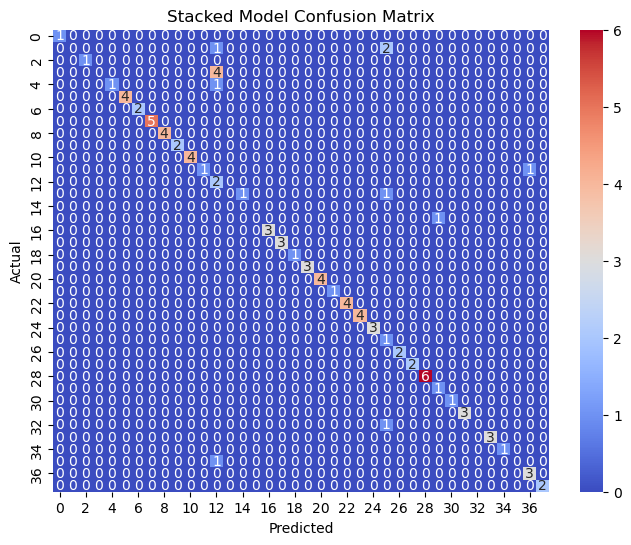

In [34]:
# The script evaluates each model (Random Forest, CNN, RNN) using accuracy, precision, recall, F1-score, and confusion matrices.
# A table compares all metrics, and a bar chart visually compares them.
# These evaluations give a comprehensive view of each model's performance.


# Ensure predictions are generated correctly for stacking
cnn_preds_train = cnn_model.predict(X_train_cnn)
rnn_preds_train = rnn_model.predict(X_train_rnn)
cnn_preds_test = cnn_model.predict(X_test_cnn)
rnn_preds_test = rnn_model.predict(X_test_rnn)

# Stacking feature preparation
X_train_stack = np.hstack([rfc_top_40.predict_proba(X_train), cnn_preds_train, rnn_preds_train])
X_test_stack = np.hstack([rfc_top_40.predict_proba(X_test), cnn_preds_test, rnn_preds_test])

# Meta-model definition and training
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression()
meta_model.fit(X_train_stack, y_train_encoded)

# Predictions and metrics
stacked_preds = meta_model.predict(X_test_stack)
stacked_preds_decoded = label_encoder.inverse_transform(stacked_preds)

stacked_accuracy = accuracy_score(y_test, stacked_preds_decoded)
stacked_f1 = f1_score(y_test, stacked_preds_decoded, average='weighted')
stacked_precision = precision_score(y_test, stacked_preds_decoded, average='weighted')
stacked_recall = recall_score(y_test, stacked_preds_decoded, average='weighted')

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1-Score: {stacked_f1:.4f}")

# Confusion Matrix
stacked_cm = confusion_matrix(y_test, stacked_preds_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(stacked_cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Stacked Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


comparison.loc['Hybrid (Ensemble)'] = [ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1]
comparison.loc['Hybrid (Stacking)'] = [stacked_accuracy, stacked_precision, stacked_recall, stacked_f1]

# Plot updated comparison
comparison.plot(kind='bar', figsize=(12, 6), colormap='tab10', rot=0)
plt.title("Model Comparison with Hybrid Models")
plt.ylabel("Score")
plt.show()


In [36]:
# Save the stacked meta-model

#  Saves the trained meta_model (a stacked or hybrid model) to a file named stacked_hybrid_model.pkl. The .pkl extension indicates it's a pickle file, which is a serialized format in Python.
# meta_model: This refers to the trained stacked or hybrid model you want to save.

joblib.dump(meta_model, "stacked_hybrid_model.pkl")

# : Loads the saved stacked_hybrid_model.pkl from disk back into the Python environment. The loaded_hybrid_model will now contain the same trained model that was saved earlier.
# Note: This allows you to load the model later for inference or further evaluation, without retraining it.
# Load the saved stacked model

loaded_hybrid_model = joblib.load("stacked_hybrid_model.pkl")

 # Prints a confirmation message indicating that the hybrid model has been saved successfully.

print("hybrid model saved")

hybrid model saved
